In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [22]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


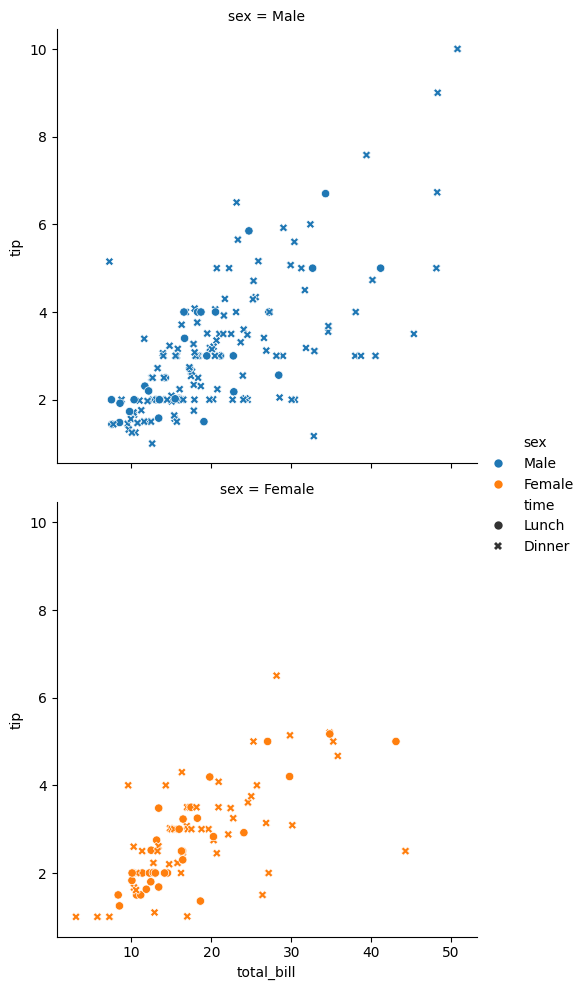

In [23]:
sns.relplot(data=tips,x='total_bill',y='tip',kind='scatter',hue="sex",style="time",row='sex')

In [24]:
gap = px.data.gapminder()

temp_df =gap[gap['country'] == "Pakistan"]
gap.head(2)



,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


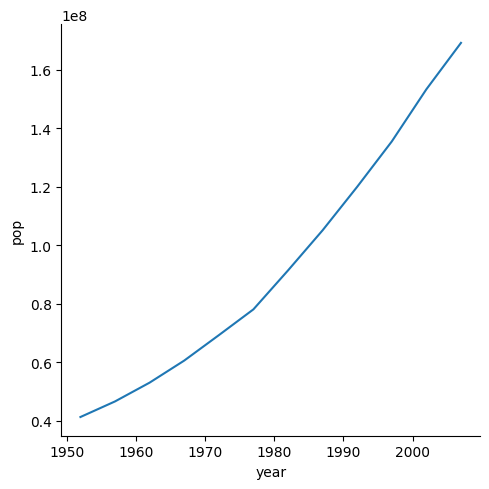

In [25]:
# population data
sns.relplot(data=temp_df,x="year",y="pop",kind='line')

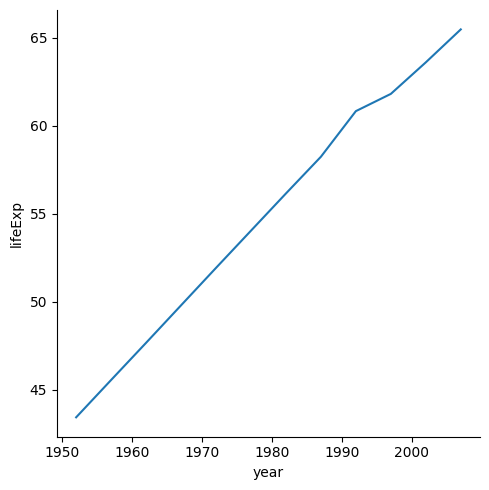

In [26]:
# pakistan life expanticy
sns.relplot(data=temp_df,x='year',y='lifeExp',kind='line')

In [27]:
countries =gap[gap['country'].isin(["Pakistan","India","Germany"])]
countries.head(1)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
564,Germany,Europe,1952,67.5,69145952,7144.114393,DEU,276


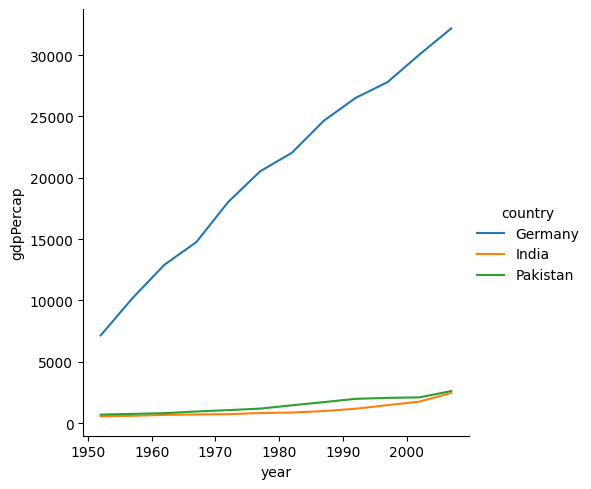

In [28]:
# Gdp per capita
sns.relplot(data=countries,x='year',y='gdpPercap',kind="line",hue="country")

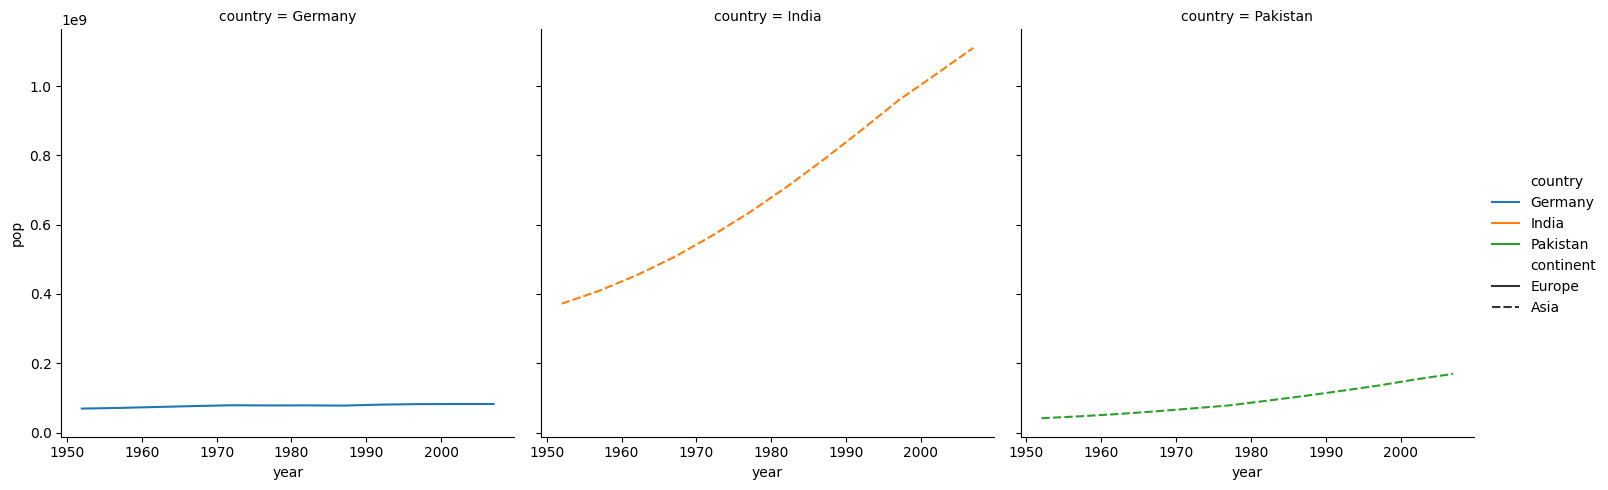

In [29]:
# pooula
sns.relplot(data=countries,x='year',y='pop',kind="line",hue="country",style="continent",col="country")

2. Distribution Plots
used for univariate analysis
used to find out the distribution
Range of the observation
Central Tendency
is the data bimodal?
Are there outliers?
Plots under distribution plot

histplot
kdeplot
rugplot

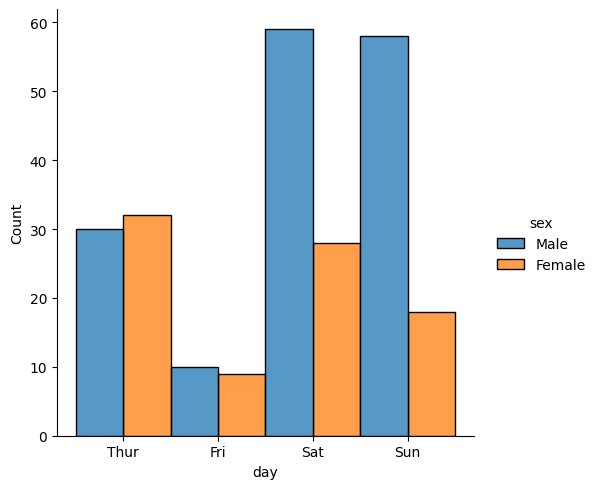

In [30]:
sns.displot(data=tips ,x='day',kind='hist',bins=5,hue='sex',multiple='dodge')


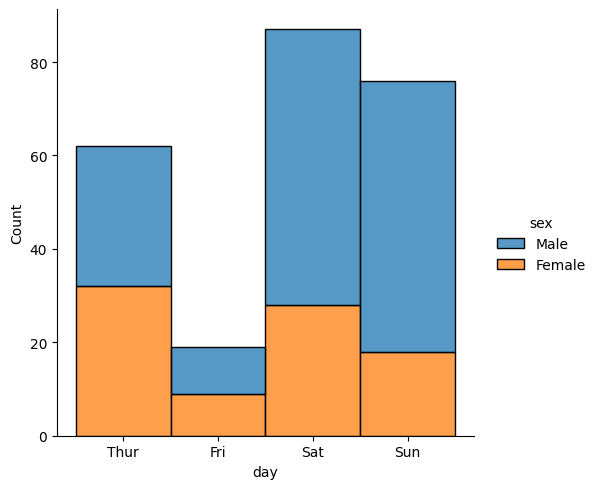

In [31]:
# It’s also possible to visualize the distribution of a categorical variable using the logic of a histogram.
# Discrete bins are automatically set for categorical variables
tips
sns.displot(data=tips,x='day',kind="hist",multiple='stack',hue='sex')

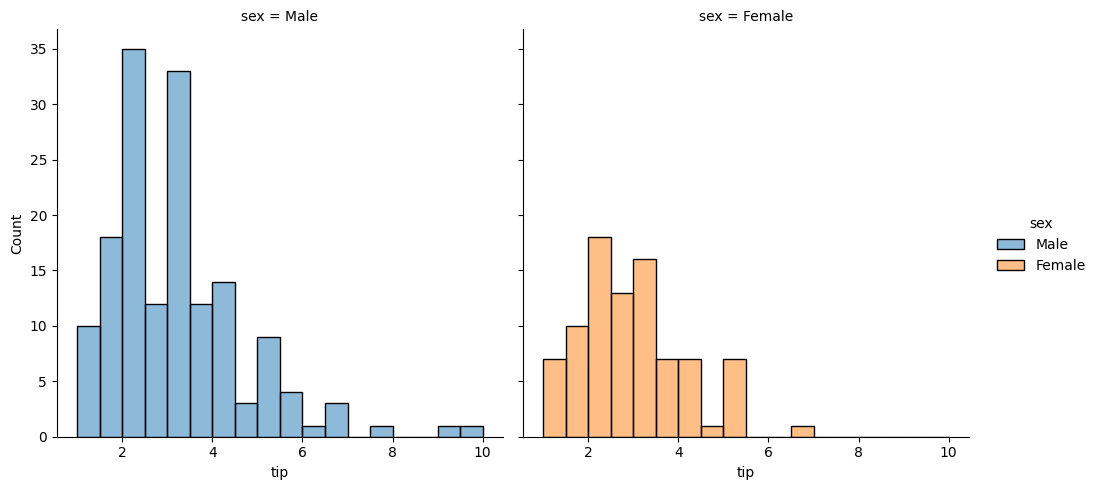

In [32]:
# faceting using col and row -> not work on histplot function
sns.displot(data=tips,x='tip',hue='sex',col='sex',kind='hist')

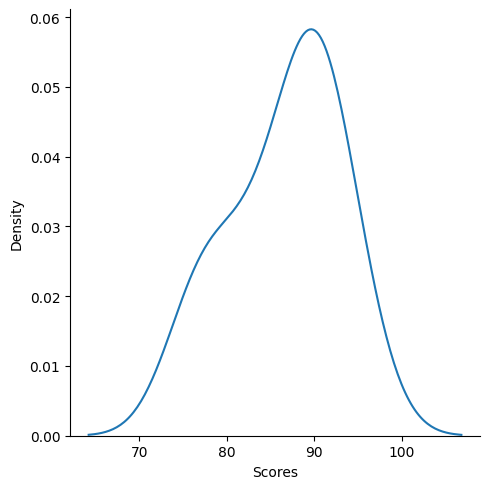

In [33]:
# kde plots 
import seaborn as sns
import pandas as pd

# Sample data
data = pd.DataFrame({'Scores': [85, 90, 78, 92, 88, 76, 95, 89, 82, 91]})

# Create a KDE plot
sns.displot(data=data,x=data['Scores'],kind='kde')

<Axes: xlabel='Scores', ylabel='Density'>

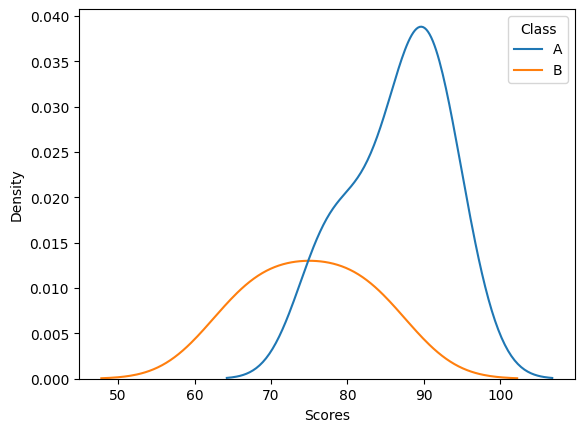

In [34]:
# usn hue


# Sample data
data = pd.DataFrame({
    'Scores': [85, 90, 78, 92, 88, 76, 95, 89, 82, 91, 70, 65, 80, 85, 75],
    'Class': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
})

# Create a KDE plot with different colors for each class
sns.kdeplot(data=data, x='Scores', hue='Class')

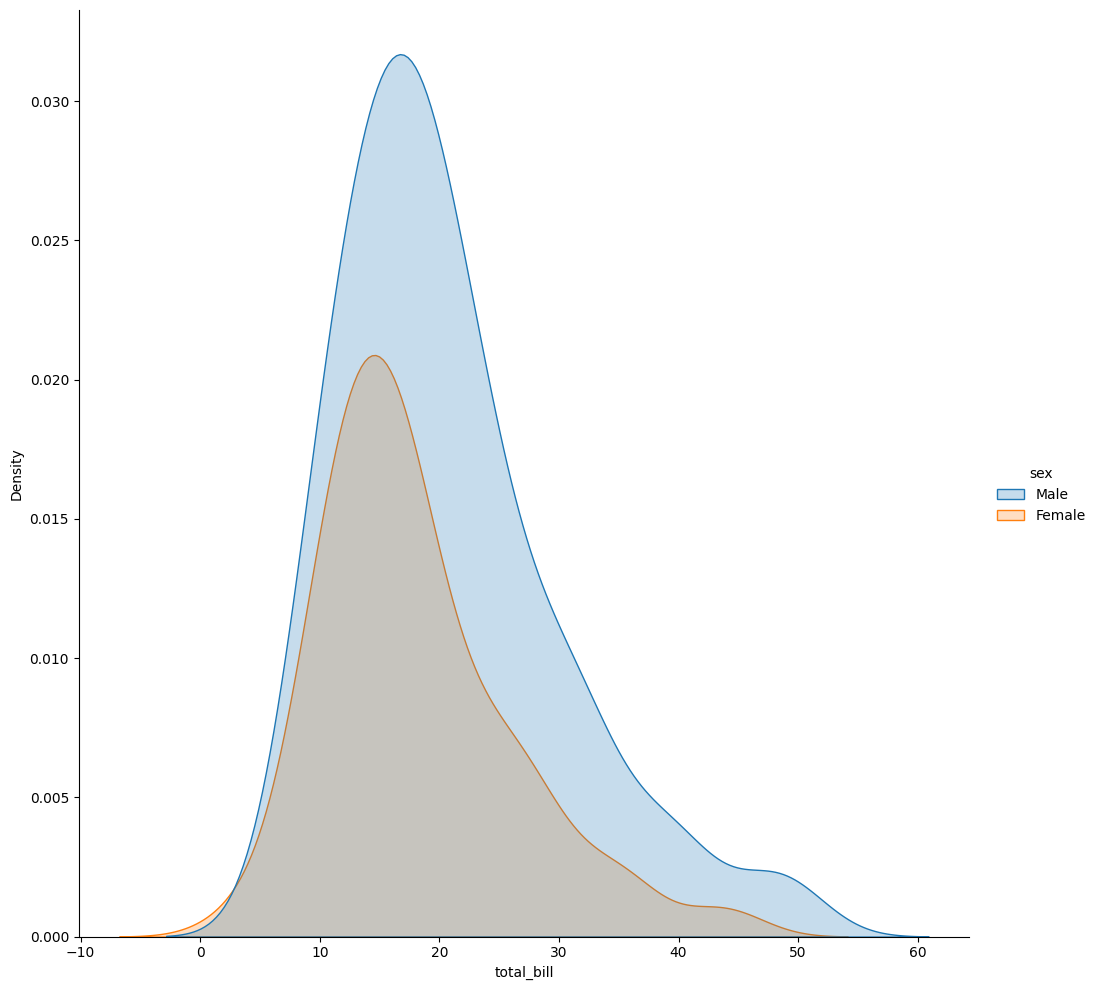

In [46]:
# hue -> fill
sns.displot(data=tips,x='total_bill',kind='kde',hue='sex',fill=True,height=10)

<Axes: xlabel='Scores', ylabel='Density'>

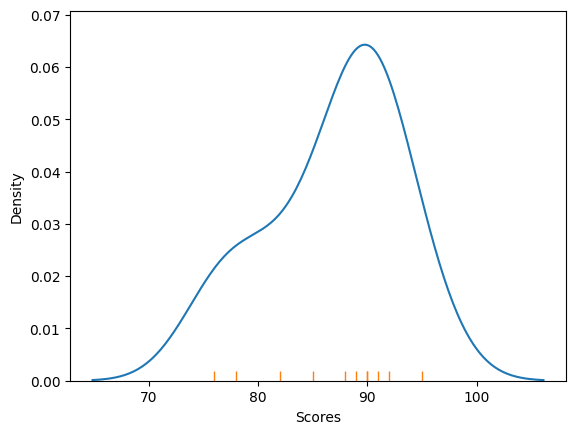

In [36]:
# rugplot


# Sample data
data = pd.DataFrame({'Scores': [85, 90,90, 78, 92, 88, 76, 95, 89, 82, 91]})

# Create a KDE plot with a rugplot
sns.kdeplot(data['Scores'])
sns.rugplot(data['Scores'])

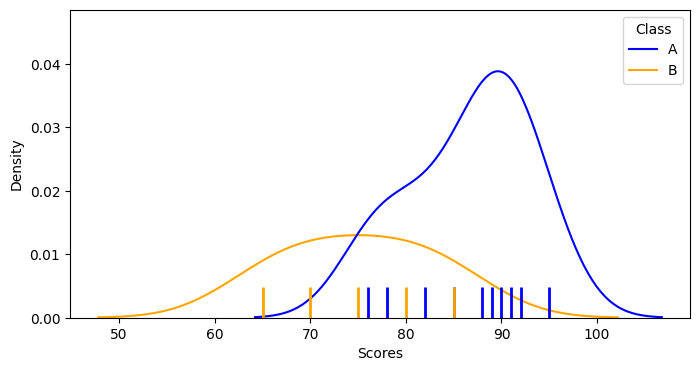

In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    'Scores': [85, 90, 78, 92, 88, 76, 95, 89, 82, 91, 70, 65, 80, 85, 75],
    'Class': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']
})

# Set figure size for better visibility
plt.figure(figsize=(8, 4))

# Create a KDE plot for context
sns.kdeplot(data=data, x='Scores', hue='Class', palette=['blue', 'orange'])

# Create a rugplot with all customizations
sns.rugplot(
    data=data, 
    x='Scores',              # Place ticks along x-axis (horizontal rugplot)
    hue='Class',             # Different colors for Class A and B
    palette=['blue', 'orange'],  # Match KDE colors
    height=0.1,              # Short ticks (10% of axis height)
    linewidth=2,           # Medium-thick ticks
)

# Show the plot
plt.show()

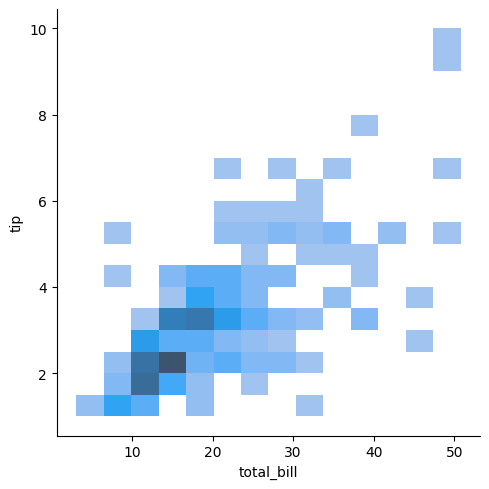

In [38]:
# Bivariate histogram
# A bivariate histogram bins the data within rectangles that tile the plot
# and then shows the count of observations within each rectangle with the fill color

# sns.histplot(data=tips, x='total_bill', y='tip')
sns.displot(data=tips, x='total_bill', y='tip',kind='hist')

In [39]:
gap
temp_df= gap.pivot(index='country',columns="year",values="lifeExp")

<Figure size 1500x1500 with 0 Axes>

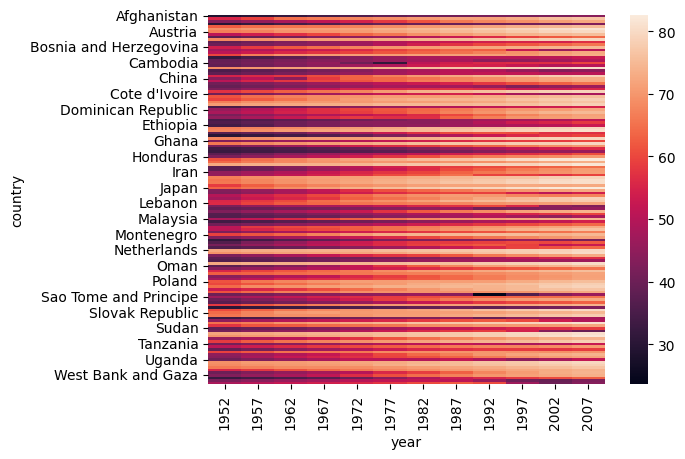

<Figure size 1500x1500 with 0 Axes>

In [40]:
# matrix -> heatmap plot
sns.heatmap(temp_df)
plt.figure(figsize=(15,15))

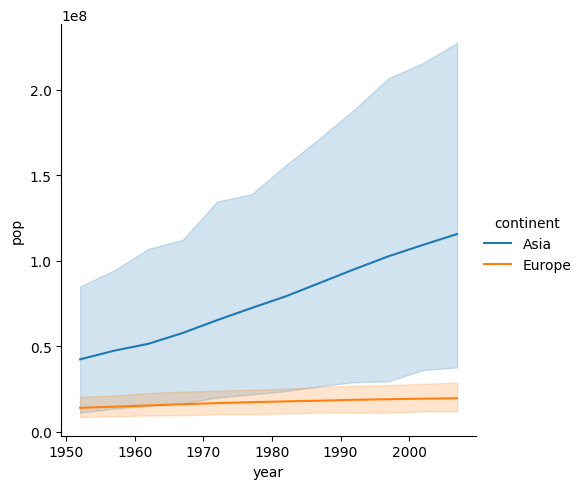

In [41]:
temp_df=gap[gap['continent'].isin(["Asia",'Europe'])]
temp_df.groupby('continent')
sns.relplot(data=temp_df,x='year',y='pop',hue='continent',kind='line')


In [42]:
# annot
temp_df = gap[gap['continent'] == 'Europe'].pivot(index='country',columns='year',values='lifeExp')

<Figure size 1500x1500 with 0 Axes>

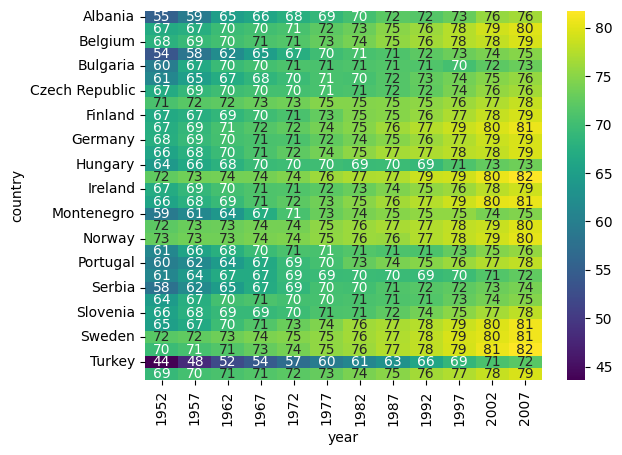

In [43]:
sns.heatmap(temp_df,cmap="viridis",annot=True)
plt.Figure(figsize=(15,15))